In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
### YOUR CODE HERE
# Figure out how to import regularizers
###
from tensorflow.keras import regularizers
import tensorflow.keras.utils as ku 
import numpy as np 

In [ ]:
import csv
sentences = []
with open("/tmp/puisi_proc.csv", 'r') as csvfile:
  reader = csv.reader(csvfile, delimiter=',')
  next(reader)
  for row in reader:
    row_length=len(row)
    for i in range(row_length):
      if row[i] !='':
        row[i].lower().split('\n')
        sentences.append(row[i])
      
    
    

In [ ]:
print (sentences[0])
#corpus = sentences[0].lower().split("\n")
print(len(sentences))

sentences=sentences[:int(len(sentences)/40)]
print(len(sentences))



Gemericik senandung luluh merayu hati, 
 Terjamah larutan mensiasati. 
  
 Terus menyabani hingga rengkarnasi. 
 Putih sejuk teramat berarti. 
 Senantiasa menanti keputusan Tuhan kapan ia akan pergi. 
  
 Bila sampai waktu nya, 
 Tetes demi tetes kian mengurai  awan. 
 Gemuruh kilat pelepas ikatan. 
 Melepas hasrat bercinta tak terhelakan, 
 Rayuan pulang tak hiraukan. 
 Merintih seduh sedan tiada guna. 
  
 Hingga hujan mengiklaskan semua 
 Demi senyuman yang menghianatinya, 
 Yang tak terima akan kehadirannya 
 Tanpa menyadari ia pantas untuk jatuh. 
  
 Jambi, 5 Mei 2017 
  
 
28040
701


In [ ]:
tokenizer = Tokenizer()


tokenizer.fit_on_texts(sentences)
total_words = len(tokenizer.word_index) + 1

# create input sequences using list of tokens
input_sequences = []
for line in sentences:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)


# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
predictors, label = input_sequences[:,:-1],input_sequences[:,-1]

label = ku.to_categorical(label, num_classes=total_words)

In [ ]:
model = Sequential()
model.add(Embedding(total_words,64,input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(150,return_sequences=True)))# An LSTM Layer)
model.add(Dropout(0.2))# A dropout layer)
model.add(LSTM(100))# Another LSTM Layer)
model.add(Dense(total_words/2,activation='relu',kernel_regularizer=regularizers.l2(0.05)))# A Dense Layer including regularizers)
model.add(Dense(total_words,activation='softmax'))# A Dense Layer)
# Pick an optimizer
adam = Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy', optimizer= adam,metrics=['acc'])# Pick a loss function and an optimizer)
print(model.summary())


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 530, 64)           320512    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 530, 300)          258000    
_________________________________________________________________
dropout_1 (Dropout)          (None, 530, 300)          0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 100)               160400    
_________________________________________________________________
dense_2 (Dense)              (None, 2504)              252904    
_________________________________________________________________
dense_3 (Dense)              (None, 5008)              12545040  
Total params: 13,536,856
Trainable params: 13,536,856
Non-trainable params: 0
__________________________________________

In [ ]:
 history = model.fit(predictors, label,epochs=100, verbose=1)

Epoch 1/100
1156/1156 [==============================] - 94s 78ms/step - loss: 8.0428 - acc: 0.0309
Epoch 2/100
1156/1156 [==============================] - 91s 79ms/step - loss: 6.9654 - acc: 0.0362
Epoch 3/100
1156/1156 [==============================] - 90s 78ms/step - loss: 6.8884 - acc: 0.0366
Epoch 4/100
1156/1156 [==============================] - 90s 78ms/step - loss: 6.7780 - acc: 0.0398
Epoch 5/100
1156/1156 [==============================] - 90s 78ms/step - loss: 6.6118 - acc: 0.0410
Epoch 6/100
1156/1156 [==============================] - 90s 78ms/step - loss: 6.4555 - acc: 0.0433
Epoch 7/100
1156/1156 [==============================] - 90s 78ms/step - loss: 6.3504 - acc: 0.0405
Epoch 8/100
1156/1156 [==============================] - 90s 78ms/step - loss: 6.2209 - acc: 0.0452
Epoch 9/100
1156/1156 [==============================] - 90s 78ms/step - loss: 6.1303 - acc: 0.0460
Epoch 10/100
1156/1156 [==============================] - 90s 78ms/step - loss: 6.0264 - acc: 0.0494

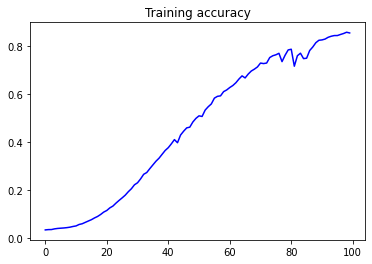

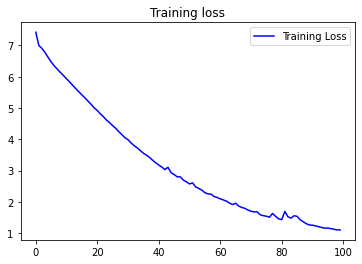

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['acc']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()

In [ ]:
seed_text = "Kau adalah separuh"
next_words = 100
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = model.predict_classes(token_list, verbose=0)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

with open('puisi.txt','w') as f:
  f.write(seed_text)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Kau adalah separuh hidup ku hanya kepadamu aku berbagi kaulah yang mengajariku atri seorang sahabat kau selalu ada untukku saat aku sedih kau hadir menghiburku saat aku menangis kau menghapuskan air mataku saat aku terjatuh kau membantuku untuk bangkit kau genggam kedua tanganku saat aku merasa takut kaulah yang sangat berarti dan dalam hidupku kau hanya pergi dan rapat kenangan dan apa ku memang menjadi setiap tubuhku malam yang membutuhkan meneliti dan dengan bila rasa kita berdua bersatu hati bukan sementara apa ini perasaan kita kata itu sahabat jika dia harus mengubah wajahmu putra anak tentangmu dari muyang tiada tara engkau janjikan pada


In [ ]:
model.save('/tmp/my_model.h5')